In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# -- import the model
from pc_vaim import *

In [32]:
# -- generate toy data
X_train, X_test, y_train, y_test = generate_data(N_samples=20000)

In [34]:
# -- instantiate pcvaim object
pcvaim = PCVAIM()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_64 (Dense)               (None, 512)          1024        ['input_9[0][0]']                
                                                                                                  
 dense_65 (Dense)               (None, 512)          262656      ['dense_64[0][0]']               
                                                                                                  
 dense_66 (Dense)               (None, 512)          262656      ['dense_65[0][0]']               
                                                                                            

In [52]:
pcvaim.epochs = 5
pcvaim.BATCH_SIZE = 512

In [57]:
# -- train the model
pcvaim.train(X_train, y_train)

Train on 12800 samples, validate on 3200 samples
Epoch 1/5
12800/12800 [==============================] - ETA: 0s - loss: 13.3676 - decoder_loss: 0.0203 - decoder_1_loss: 13.2406
Epoch 1: val_loss improved from inf to 13.89012, saving model to outputs/
INFO:tensorflow:Assets written to: outputs/assets
12800/12800 [==============================] - 28s 2ms/sample - loss: 13.3676 - decoder_loss: 0.0203 - decoder_1_loss: 13.2406 - val_loss: 13.8901 - val_decoder_loss: 0.0185 - val_decoder_1_loss: 13.7652
Epoch 2/5
12800/12800 [==============================] - ETA: 0s - loss: 13.3671 - decoder_loss: 0.0216 - decoder_1_loss: 13.2396
Epoch 2: val_loss did not improve from 13.89012
12800/12800 [==============================] - 11s 878us/sample - loss: 13.3671 - decoder_loss: 0.0216 - decoder_1_loss: 13.2396 - val_loss: 13.8940 - val_decoder_loss: 0.0305 - val_decoder_1_loss: 13.7581
Epoch 3/5
12800/12800 [==============================] - ETA: 0s - loss: 13.3689 - decoder_loss: 0.0208 - dec

In [58]:
latent_mean, latent_std, z = predict(pcvaim, y_train)
z_samples = sample(latent_mean, latent_std, y_train)
point_cloud = generate_test_example(z)
results = pcvaim.decoder.predict([z_samples, point_cloud])

In [59]:
a = results[0]

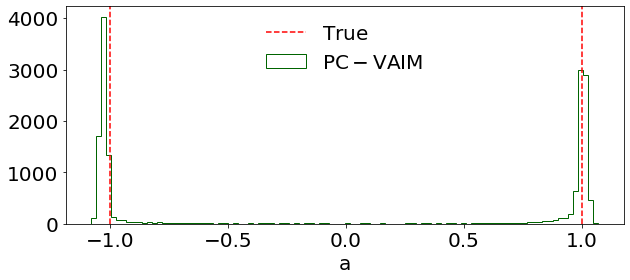

In [60]:
plt.figure(figsize = (10,4))
plt.tick_params(labelsize = 20)
plt.hist(a[:,0], bins=100, histtype = 'step', color = 'darkgreen', label = r'$\rm PC-VAIM$')
plt.xlabel(r'$\rm a $', size=20)
plt.axvline(1, linestyle='dashed',color= 'r',label=r'$\rm  True$' )
plt.axvline(-1, linestyle='dashed',color= 'r')
plt.legend(frameon = 0, loc = 'upper center', fontsize = 20)
plt.show()

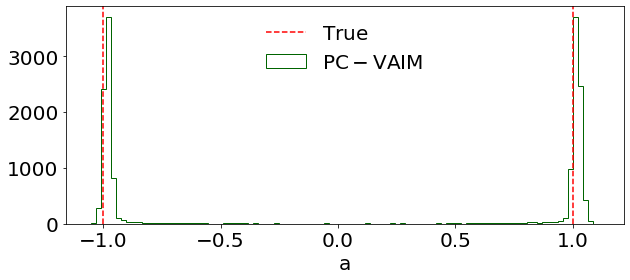

In [47]:
plt.figure(figsize = (10,4))
plt.tick_params(labelsize = 20)
plt.hist(a[:,0], bins=100, histtype = 'step', color = 'darkgreen', label = r'$\rm PC-VAIM$')
plt.xlabel(r'$\rm a $', size=20)
plt.axvline(1, linestyle='dashed',color= 'r',label=r'$\rm  True$' )
plt.axvline(-1, linestyle='dashed',color= 'r')
plt.legend(frameon = 0, loc = 'upper center', fontsize = 20)
plt.show()